In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


x = pd.read_table('MovieBoxOffice1.txt', header=None)
x.columns = ['Release Date','Movie Title','Production Budget','Domestic Grosses','Worldwide Grosses']
def removesigns(x):
    for i in x:
        x[i] = x[i].str.replace('$', '')
        x[i] = x[i].str.replace(',', '')
removesigns(x)
x
x.to_csv('MoviePandas.csv')
x = pd.read_csv('MoviePandas.csv', index_col=0)
x['Foreign Grosses'] = x['Worldwide Grosses'] - x['Domestic Grosses']
x['Release Date'] = pd.to_datetime(x['Release Date'], format="%m/%d/%Y")
a = x
a
x = np.array(a['Production Budget']) 
y = np.array(a['Domestic Grosses'])
z = np.array(a['Foreign Grosses'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic Grosses')
ax.set_zlabel('Foreign Grosses')

plt.show()

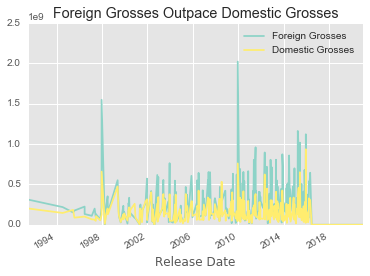

In [4]:
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
a = a.set_index(a['Release Date'])
a = a[::-1]
a[['Foreign Grosses','Domestic Grosses']].plot(title = 'Foreign Grosses Outpace Domestic Grosses', colormap = 'Set3')

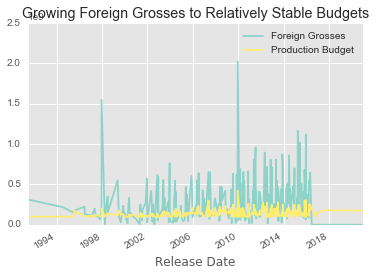

In [5]:
a[['Foreign Grosses', 'Production Budget']].plot(title = 'Growing Foreign Grosses to Relatively Stable Budgets', colormap = 'Set3')

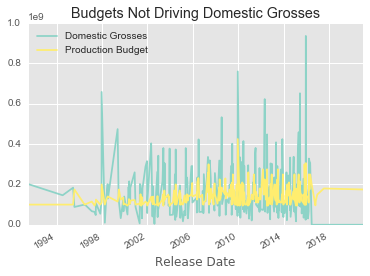

In [6]:
a[['Domestic Grosses','Production Budget']].plot(title = 'Budgets Not Driving Domestic Grosses', colormap = 'Set3')

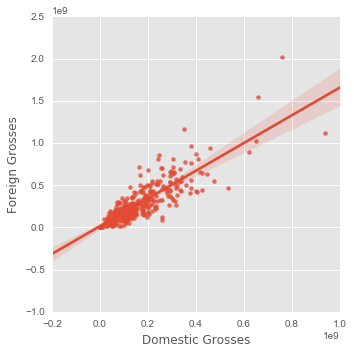

In [12]:
sns.lmplot(x='Domestic Grosses', y='Foreign Grosses', data=a)

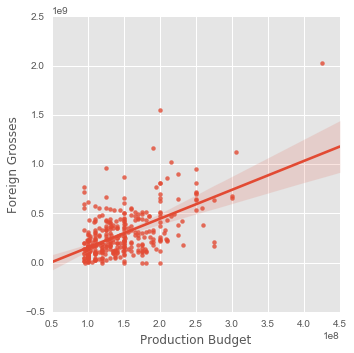

In [13]:
sns.lmplot(x='Production Budget', y='Foreign Grosses', data=a)

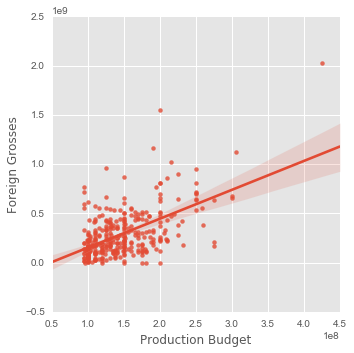